 # **AIR** **QUALITY** **PREDICTION MODEL**




**Name** : Raziya Firosh


**Organisation** : Entri Elevate


**Date**: 25/04/2025

# **1**. **Overview** **of** **problem** **Statement**

Air pollution is a major global concern, affecting human health, climate, and ecosystems. Monitoring air quality is essential for understanding pollution levels, identifying key pollutants, and taking necessary actions to improve environmental conditions. However, with increasing urbanization and industrialization, air pollution levels continue to rise, posing serious health risks. This study aims to analyze air quality data to identify trends, detect anomalies, and understand the impact of various pollutants on environmental and human health.

# **2**.**Objective**

To analyze air quality data, identify pollution trends, assess key pollutants’ impact, and provide insights for environmental improvement.

# **3**. **Data** **Description**

 **Source**: **Data** **World**

##**Features in the dataset:**

The dataset consists of  **12** columns representing different air quality attributes and **18,025** rows, each corresponding to a specific air quality measurement recorded at a given location and time.


•	**Unique** **ID**: A unique identifier for each data entry.

•	**Indicator** **ID**: Represents different air quality indicators.

•	**Name**: The name of the air quality indicator (e.g., “Ozone (O3)”, “Boiler Emissions- Total SO2 Emissions”).

•	**Measure**: Specifies the type of measurement (e.g., “Mean”, “Number per km²”).

•	**Measure** **Info**: Additional information about the measurement, such as units (e.g., “ppb”, “number”).

•	**Geo** **Type** **Name**: The geographic level of the data (e.g., “UHF42”, “UHF34”).

•	**Geo** **Join** **ID**: A numerical ID for joining geographic data.

•	**Geo** **Place** **Name**: The name of the geographic area where data was collected.

•	**Time** **Period**: The time period for which data was recorded (e.g., “Summer
2014”, “2015”).

•	**Start_Date**: The exact start date of data collection.

•	**Data** **Value**: The actual recorded air quality value. This is likely the target variable.

•	**Message**: Contains additional notes, sometimes missing (NaN).

 **Target variable**:  **Data Value**

#4. **Data** **Collection**

**Dataset link**      :https://catalog.data.gov/dataset/air-quality

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Air_Quality.csv to Air_Quality.csv


###**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding
from sklearn.ensemble import RandomForestClassifier  # Example classification model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluation

In [ ]:
data = pd.read_csv('Air_Quality.csv')
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,06/01/2014,24.9,NaN
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7,NaN
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0,NaN
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN


In [ ]:
#displaying first 5 rows
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,06/01/2014,24.9,NaN
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7,NaN
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0,NaN
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9,NaN


In [ ]:
#displaying last 5 rows
data.tail()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN
18024,151658,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,408.0,Jamaica,2005,01/01/2005,41.0,NaN


#**5. Data Preprocessing- Data Cleaning**

In [ ]:
#Data Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


In [ ]:
data.shape

(18025, 12)

In [ ]:
data.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,18025.000000,18025.000000,1.801600e+04,18025.000000,0.0
mean,426387.692705,434.830180,5.906303e+05,21.428616,NaN
std,250489.450630,115.852371,7.769549e+06,23.999345,NaN
min,121644.000000,365.000000,1.000000e+00,0.000000,NaN
25%,175303.000000,365.000000,2.020000e+02,8.900000,NaN
50%,410803.000000,375.000000,3.030000e+02,15.200000,NaN
75%,649893.000000,386.000000,4.040000e+02,26.700000,NaN
max,828353.000000,661.000000,1.051061e+08,424.700000,NaN


**Mean>50% - which means positively skewed**

**Mean<50% - which means negatively skewed**

In [ ]:
print(data.describe())

           Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   18025.000000  18025.000000  1.801600e+04  18025.000000      0.0
mean   426387.692705    434.830180  5.906303e+05     21.428616      NaN
std    250489.450630    115.852371  7.769549e+06     23.999345      NaN
min    121644.000000    365.000000  1.000000e+00      0.000000      NaN
25%    175303.000000    365.000000  2.020000e+02      8.900000      NaN
50%    410803.000000    375.000000  3.030000e+02     15.200000      NaN
75%    649893.000000    386.000000  4.040000e+02     26.700000      NaN
max    828353.000000    661.000000  1.051061e+08    424.700000      NaN


###**1**. **Handling** **Missing** **Values**

In [ ]:
 # To check the null values
data.isnull().sum()

,0
Unique ID,0
Indicator ID,0
Name,0
Measure,0
Measure Info,0
Geo Type Name,0
Geo Join ID,9
Geo Place Name,9
Time Period,0
Start_Date,0


Yes, There is a missing values in the dataset ;

Column "Geo Join ID" : 9 missing values

Column "Geo Place Name" :9 missing values

Column "Message" :18,025 missing values (completely empty)

The "Message" column can likely be dropped since it contains no useful data. The missing values in "Geo Join ID" and "Geo Place Name" should be handled, either by filling them with appropriate values or dropping the affected rows.
Here missing values are very few so i remove the missing values.


**Removing Missing Values**

Since the "Message" column has 18,025 missing values, it's almost empty and not useful for analysis.

In [ ]:
# Removes columns with missing values
data.drop(columns=["Message"], inplace=True)

In [ ]:
# Removes rows with missing values
data.dropna(subset=["Geo Join ID", "Geo Place Name"], inplace=True)

**Checking** **Duplicates**

In [ ]:
data.duplicated().sum()

np.int64(0)

**No, there are no duplicate rows in the dataset. All records are unique.**

**Check if missing values are handled correctly:**

In [ ]:
print(data.isnull().sum())  # Should show 0 missing values in important columns
print(data.shape)  # Verify dataset size

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64
(18016, 11)


In [ ]:
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,06/01/2014,24.9
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9
...,...,...,...,...,...,...,...,...,...,...,...
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8


###**2**.**Checking Outliers**

In [ ]:
data.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value
count,18016.000000,18016.000000,1.801600e+04,18016.000000
mean,426187.112789,434.720748,5.906303e+05,21.412678
std,250391.154793,115.777767,7.769549e+06,23.976151
min,121644.000000,365.000000,1.000000e+00,0.000000
25%,175300.750000,365.000000,2.020000e+02,8.900000
50%,410798.500000,375.000000,3.030000e+02,15.200000
75%,649886.250000,386.000000,4.040000e+02,26.700000
max,828353.000000,661.000000,1.051061e+08,424.700000


In [ ]:
 #Calculate skewness for each numerical column
skewness = data.skew(numeric_only=True)

# Display skewness values
print("\nSkewness of Numeric Columns:\n", skewness)


Skewness of Numeric Columns:
 Unique ID        0.267830
Indicator ID     1.307189
Geo Join ID     13.377958
Data Value       4.756117
dtype: float64


**Symmetrical Distribution: Skewness is around 0.**

**Moderately Skewed: Skewness between -0.5 and 0.5.**

**Highly Skewed: Skewness less than -1 or greater than 1.**


**Through this we can understand that outliers are present in this dataset.**

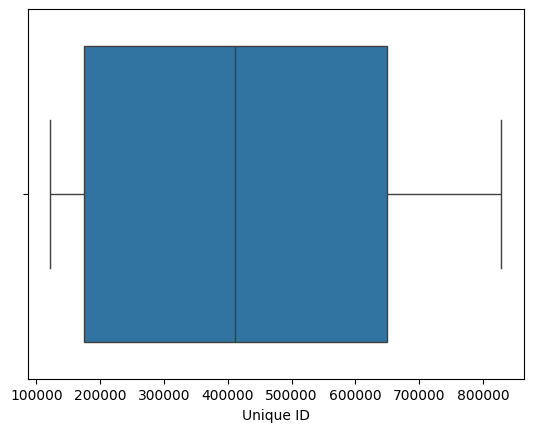

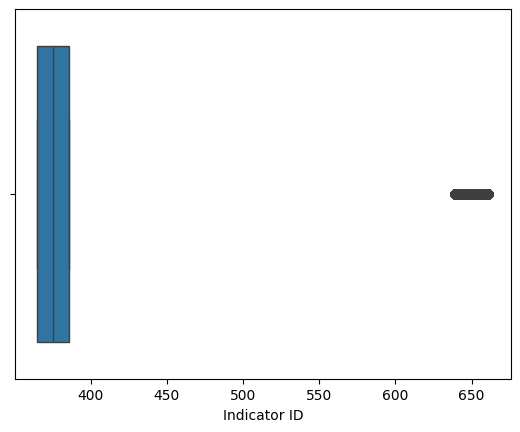

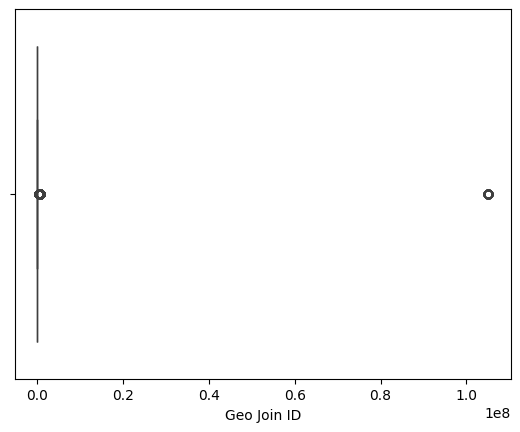

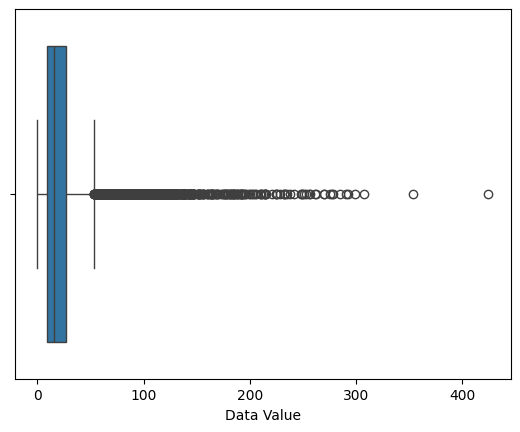

In [ ]:
# Boxplot to identify outliers

for i in data.select_dtypes(include="number").columns:
  sns.boxplot(data=data,x=i)
  plt.show()

In [ ]:
import numpy as np

# To remove outliers using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# To numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    data = remove_outliers(data, col)

print("Outliers removed.")

Outliers removed.


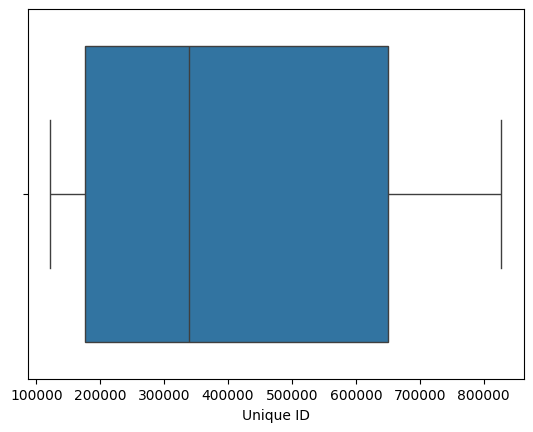

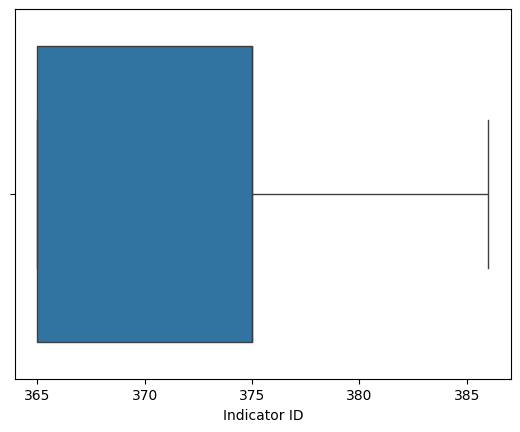

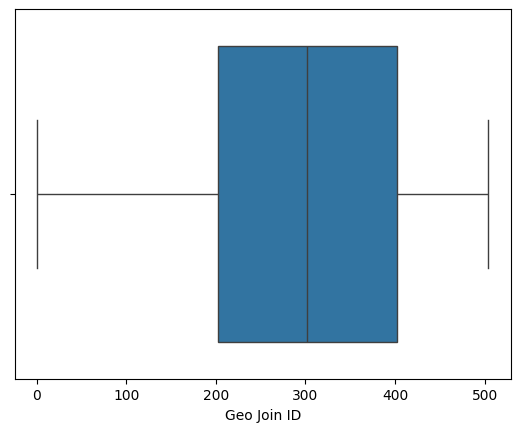

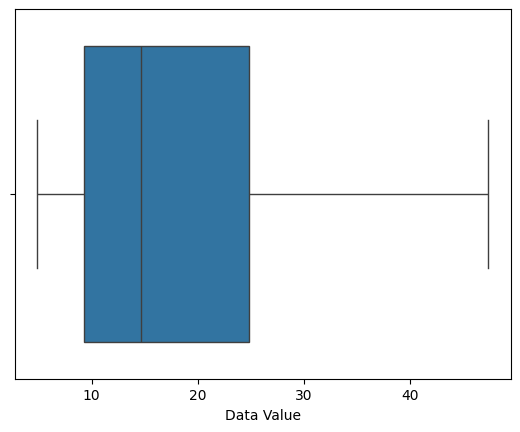

In [ ]:
# Boxplot After Removing Outliers

for i in data.select_dtypes(include="number").columns:
  sns.boxplot(data=data,x=i)
  plt.show()

In [ ]:
#Checking for Skewness
print("Skewness:\n", data.skew(numeric_only=True))

Skewness:
 Unique ID       0.303327
Indicator ID    0.534404
Geo Join ID    -0.130905
Data Value      0.512722
dtype: float64


In [ ]:
data.shape

(13265, 11)

In [ ]:
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9
6,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
7,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0
...,...,...,...,...,...,...,...,...,...,...,...
17980,825908,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Annual Average 2022,01/01/2022,16.9
17981,602875,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Winter 2017-18,12/01/2017,25.6
17982,171581,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,405.0,Ridgewood - Forest Hills,Winter 2008-09,12/01/2008,29.9
17983,602890,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,402.0,West Queens,Winter 2017-18,12/01/2017,26.8


##**Data preprocessing is over**

#**6. Exploratory Data Analysis (EDA)**

In [ ]:
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9
6,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
7,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0
...,...,...,...,...,...,...,...,...,...,...,...
17980,825908,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Annual Average 2022,01/01/2022,16.9
17981,602875,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Winter 2017-18,12/01/2017,25.6
17982,171581,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,405.0,Ridgewood - Forest Hills,Winter 2008-09,12/01/2008,29.9
17983,602890,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,402.0,West Queens,Winter 2017-18,12/01/2017,26.8


In [ ]:
#print all columns
cols=data.columns
cols


Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value'],
      dtype='object')

#**Histogram**

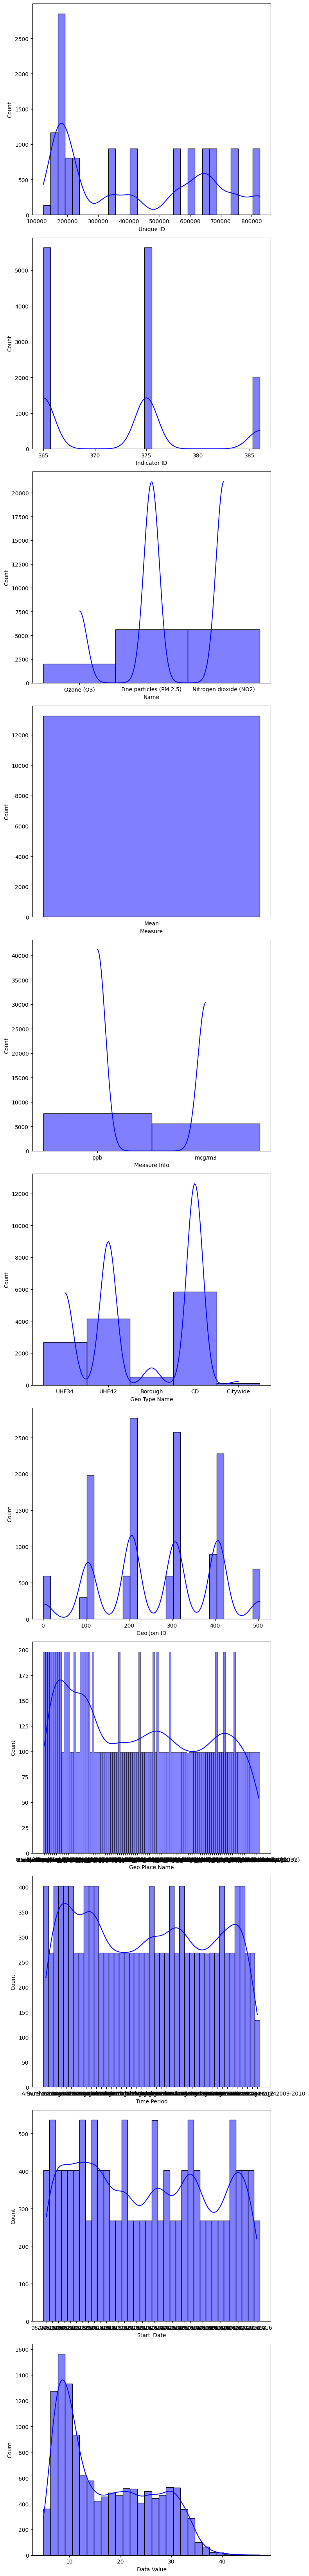

In [ ]:
# Create histograms for all columns
fig, axs = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(8, 6 * len(data.columns)))

for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=30, kde=True, ax=axs[i], color='blue')

plt.tight_layout()
plt.show()

#**Boxplot**

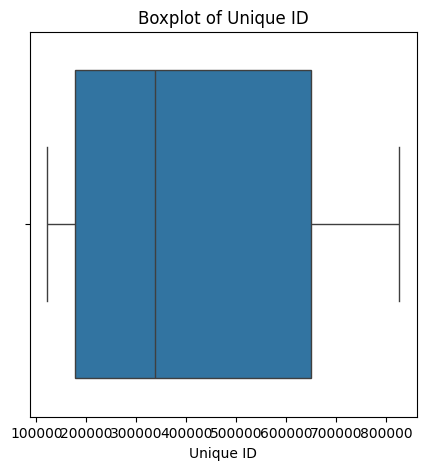

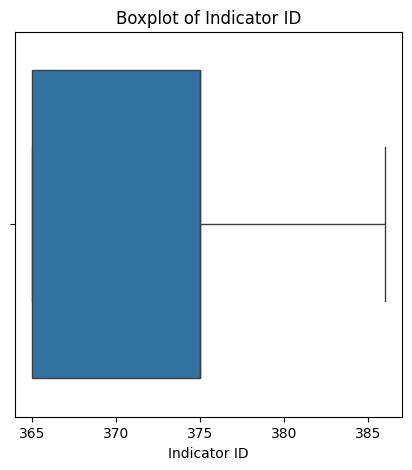

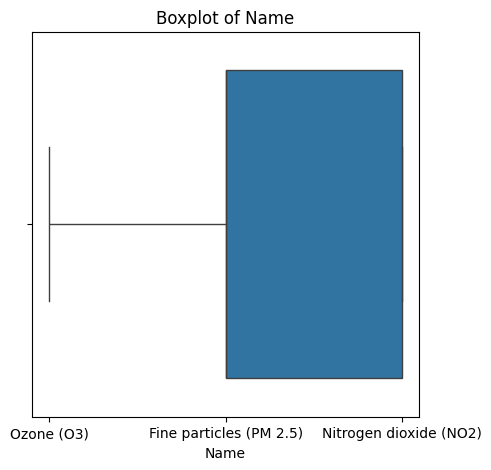

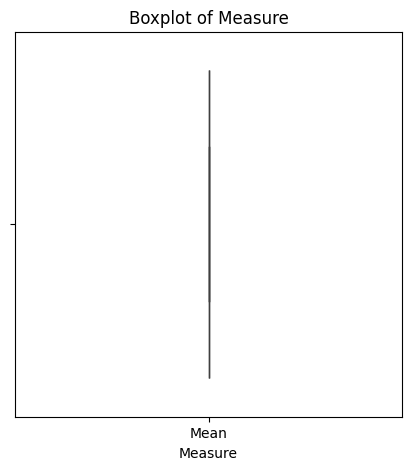

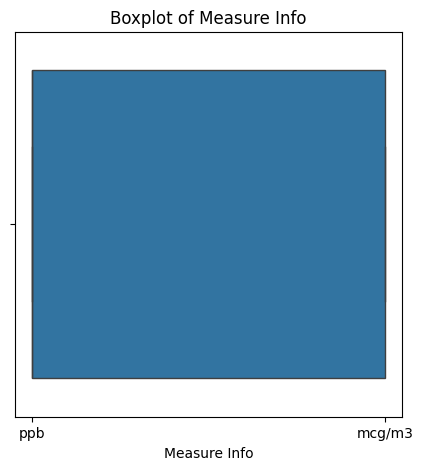

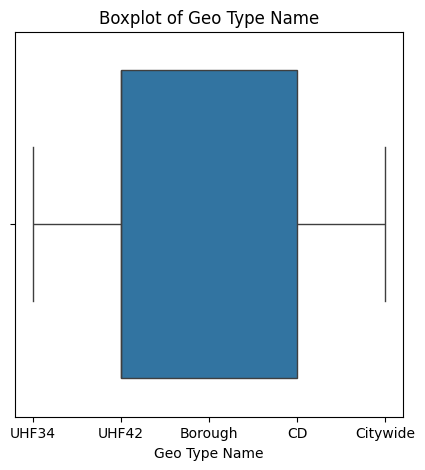

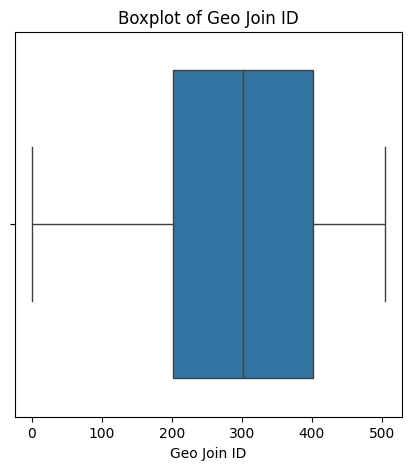

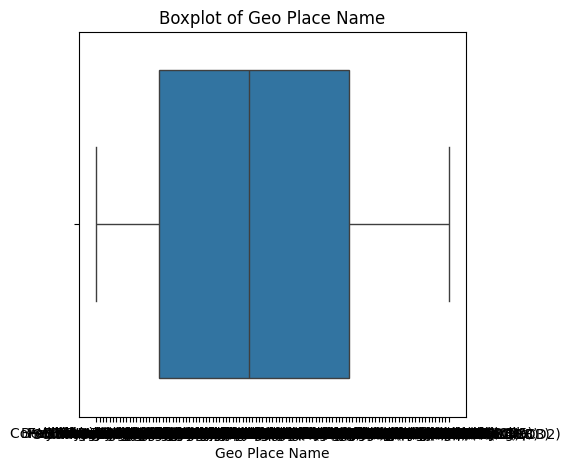

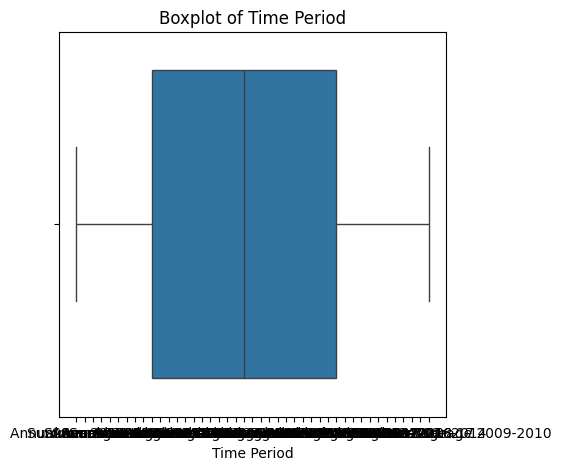

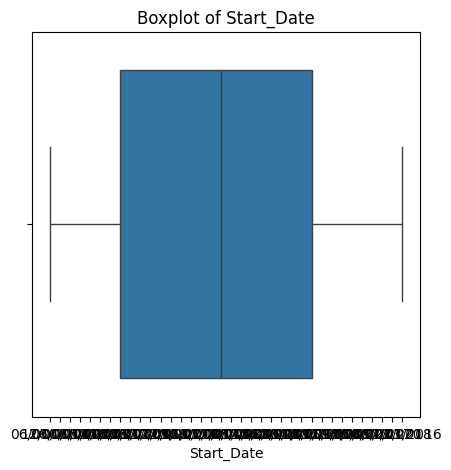

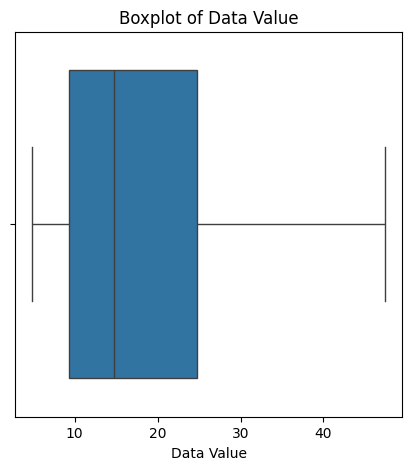

In [ ]:
for column in cols:
  plt.figure(figsize=(5,5))
  sns.boxplot(x=data[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

##**Correlation** **heatmap**

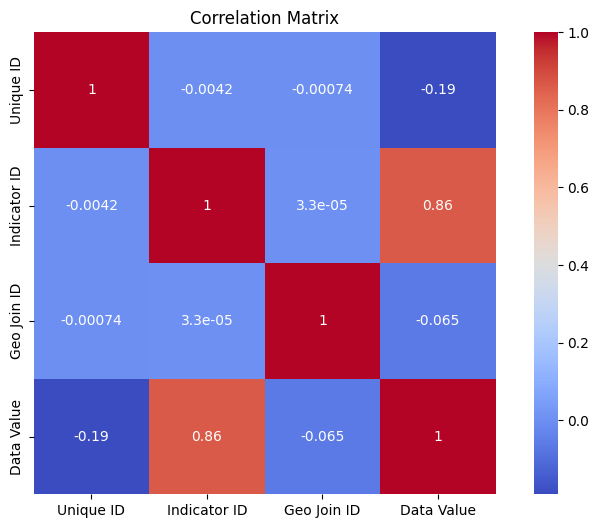

In [ ]:
#4.Heatmap Correlation
corr_matrix = data[['Unique ID', 'Indicator ID', 'Geo Join ID','Data Value']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

##**Pairplot**

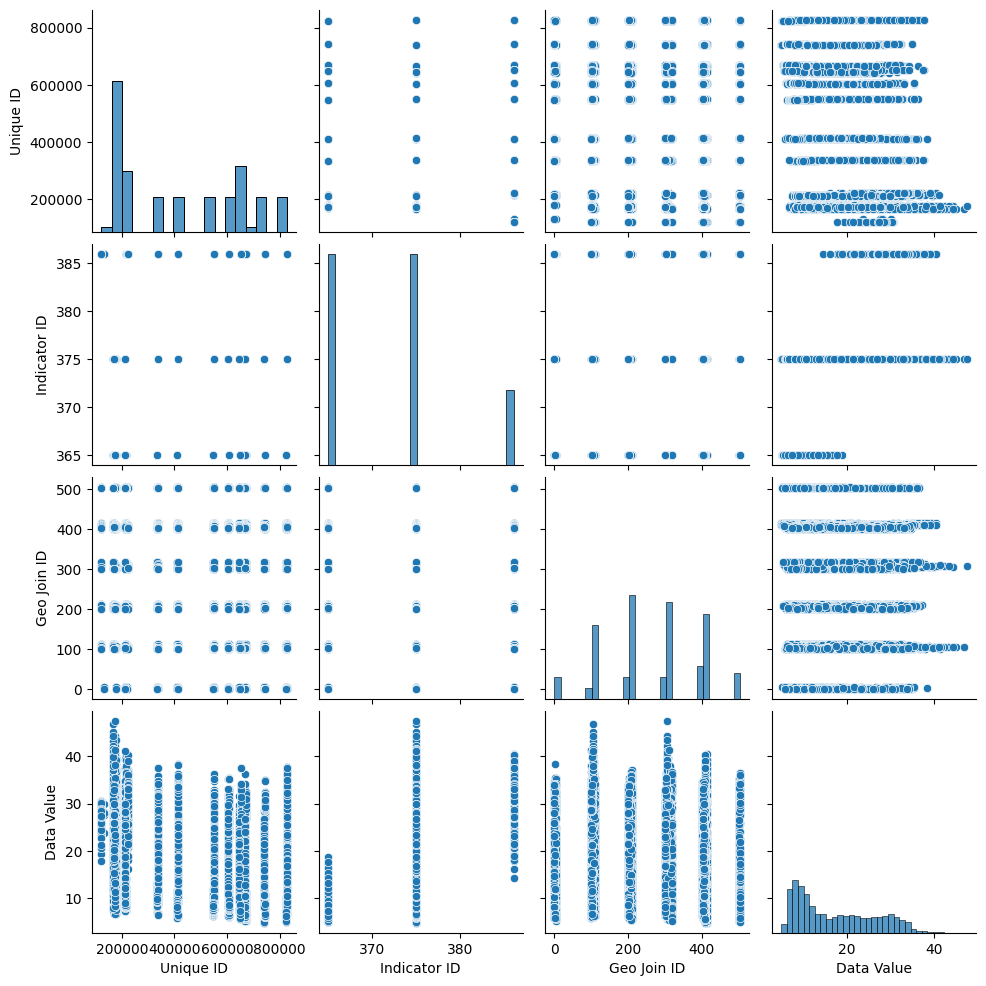

In [ ]:
sns.pairplot(data)
plt.show()

##**Pie Chart**

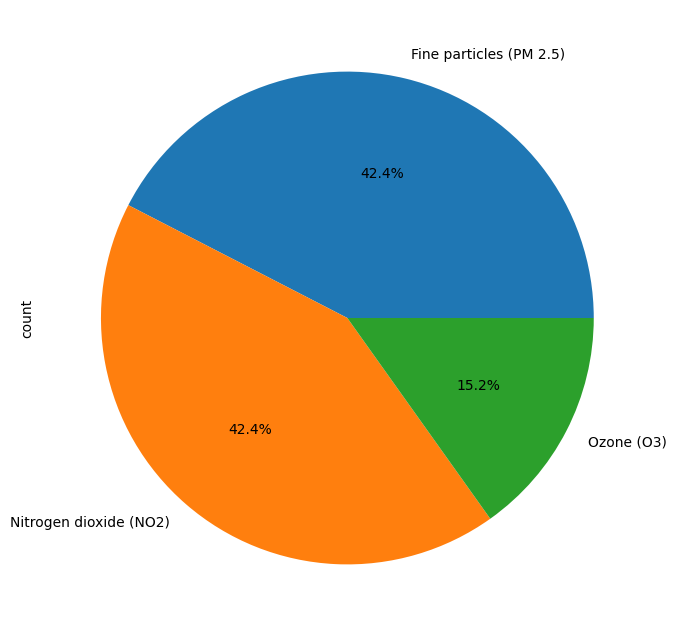

In [ ]:
data['Name'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.show()

##**Barplot**

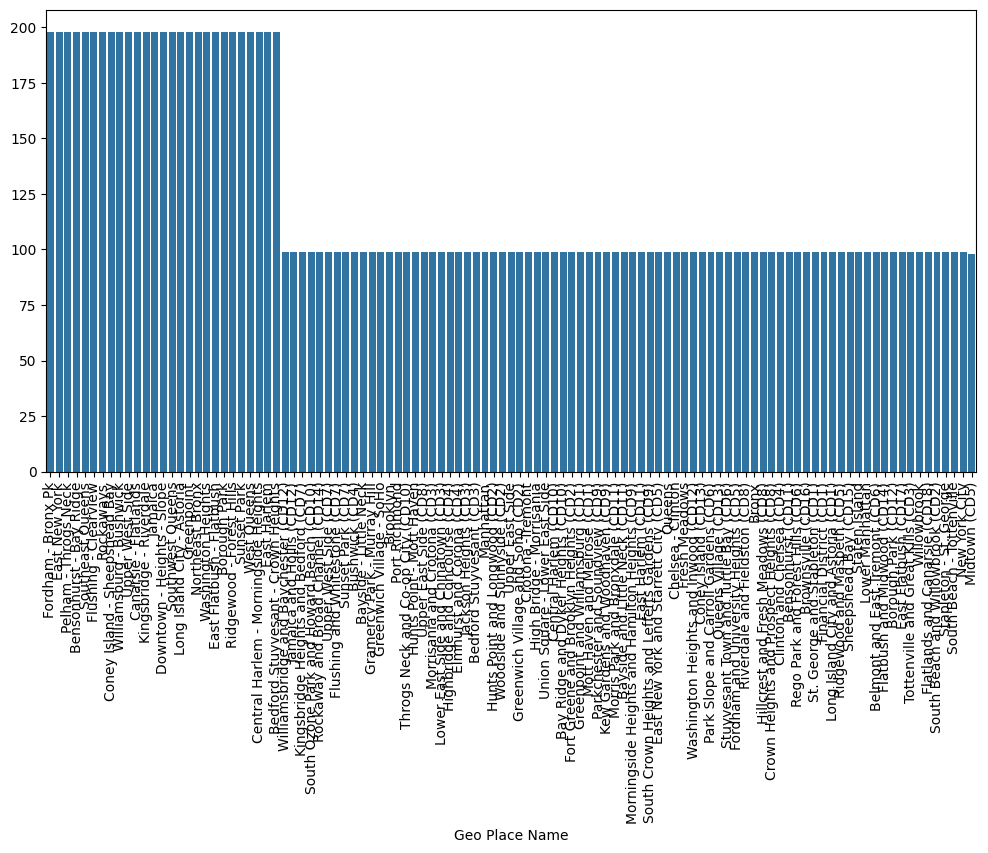

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data["Geo Place Name"].value_counts().index, y=data["Geo Place Name"].value_counts().values)
plt.xticks(rotation=90)
plt.show()

##**Count** **Plot**

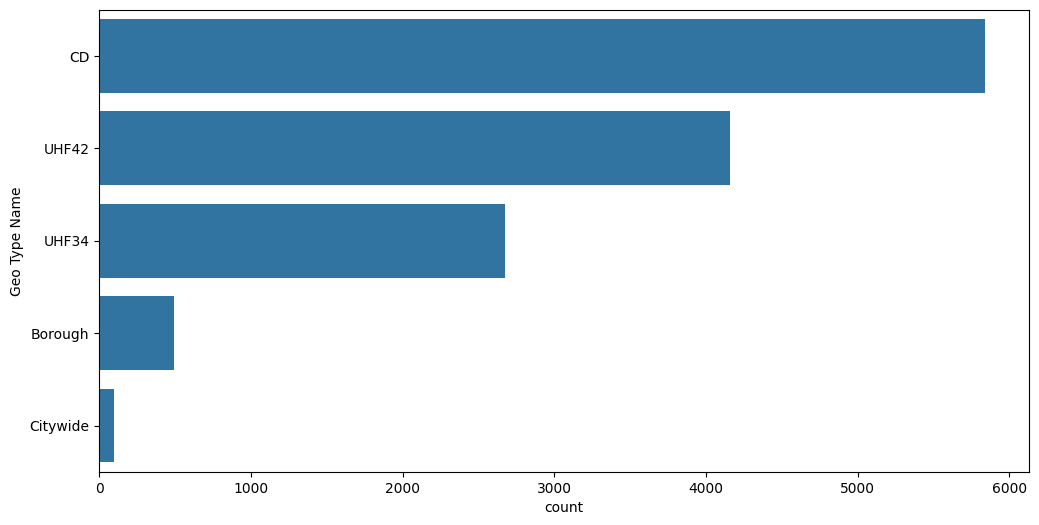

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=data["Geo Type Name"], order=data["Geo Type Name"].value_counts().index)
plt.show()

##**Lineplot**

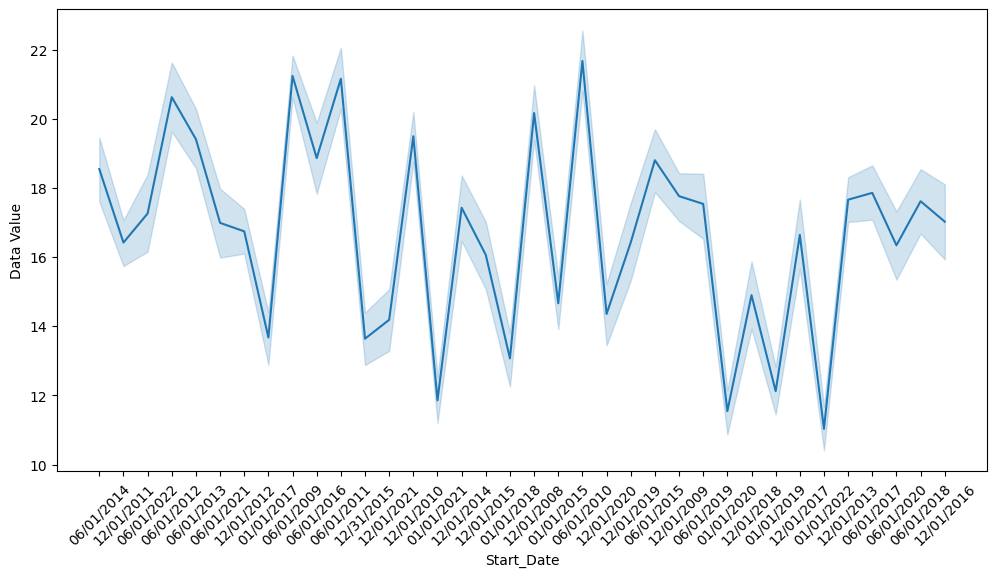

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data["Start_Date"], y=data["Data Value"])
plt.xticks(rotation=45)
plt.show()

##**Kernel Density Estimation (KDE)**

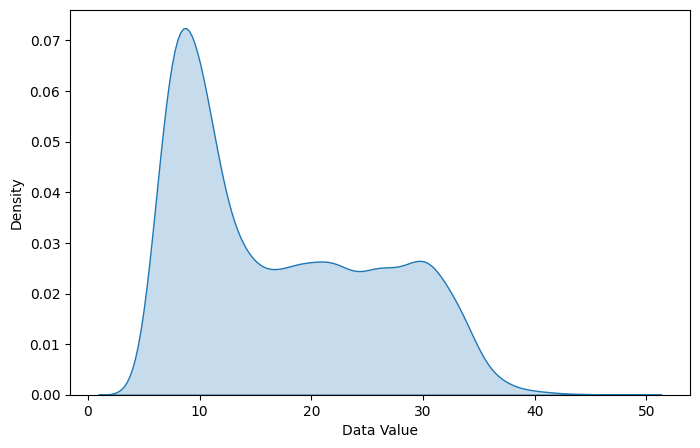

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data["Data Value"], fill=True)
plt.show()

#**7. Feature Engineering**

In [ ]:
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9
6,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6
7,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0
...,...,...,...,...,...,...,...,...,...,...,...
17980,825908,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Annual Average 2022,01/01/2022,16.9
17981,602875,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,301.0,Washington Heights,Winter 2017-18,12/01/2017,25.6
17982,171581,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,405.0,Ridgewood - Forest Hills,Winter 2008-09,12/01/2008,29.9
17983,602890,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,402.0,West Queens,Winter 2017-18,12/01/2017,26.8


In [ ]:
#print all columns
cols=data.columns
cols

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value'],
      dtype='object')

In [ ]:
Cat_cols = data.select_dtypes(include=['object']).columns
Num_cols = data.select_dtypes(include=['int64','float64']).columns

print("\n Number of Categorical Columns are : ", len(Cat_cols))
print("\n Number of Numerical Columns are : ", len(Num_cols))



 Number of Categorical Columns are :  7

 Number of Numerical Columns are :  4


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns safely
data.drop(columns=['Unique ID', 'Geo Join ID'], inplace=True, errors='ignore')

# Convert 'Start_Date' to datetime and extract year/month
data['Start_Date'] = pd.to_datetime(data['Start_Date'], errors='coerce')
data['Year'] = data['Start_Date'].dt.year
data['Month'] = data['Start_Date'].dt.month
data.drop(columns=['Start_Date'], inplace=True)

# One-Hot Encoding for nominal categorical features
data = pd.get_dummies(data, columns=['Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name'], drop_first=True)

# Label Encoding for ordered categorical feature
label_encoder = LabelEncoder()
data['Time Period'] = label_encoder.fit_transform(data['Time Period'])

# Preview processed data
print(data.head())


   Indicator ID  Time Period  Data Value  Year  Month  \
2           386           20        30.7  2014      6   
3           386           20        32.0  2014      6   
4           386           20        31.9  2014      6   
6           365            4         8.6  2011     12   
7           365            4         8.0  2011     12   

   Name_Nitrogen dioxide (NO2)  Name_Ozone (O3)  Measure Info_ppb  \
2                        False             True              True   
3                        False             True              True   
4                        False             True              True   
6                        False            False             False   
7                        False            False             False   

   Geo Type Name_CD  Geo Type Name_Citywide  ...  \
2             False                   False  ...   
3             False                   False  ...   
4             False                   False  ...   
6             False               

In [ ]:
data


,Indicator ID,Time Period,Data Value,Year,Month,Name_Nitrogen dioxide (NO2),Name_Ozone (O3),Measure Info_ppb,Geo Type Name_CD,Geo Type Name_Citywide,...,Geo Place Name_Upper East Side (CD8),Geo Place Name_Upper West Side,Geo Place Name_Upper West Side (CD7),Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2)
2,386,20,30.7,2014,6,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,386,20,32.0,2014,6,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,386,20,31.9,2014,6,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,365,4,8.6,2011,12,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,365,4,8.0,2011,12,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17980,375,14,16.9,2022,1,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
17981,375,38,25.6,2017,12,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
17982,375,29,29.9,2008,12,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
17983,375,38,26.8,2017,12,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
import pandas as pd


bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

print(data.head())

   Indicator ID  Time Period  Data Value  Year  Month  \
2           386           20        30.7  2014      6   
3           386           20        32.0  2014      6   
4           386           20        31.9  2014      6   
6           365            4         8.6  2011     12   
7           365            4         8.0  2011     12   

   Name_Nitrogen dioxide (NO2)  Name_Ozone (O3)  Measure Info_ppb  \
2                            0                1                 1   
3                            0                1                 1   
4                            0                1                 1   
6                            0                0                 0   
7                            0                0                 0   

   Geo Type Name_CD  Geo Type Name_Citywide  ...  \
2                 0                       0  ...   
3                 0                       0  ...   
4                 0                       0  ...   
6                 0               

In [ ]:
print(data.head())

   Indicator ID  Time Period  Data Value  Year  Month  \
2           386           20        30.7  2014      6   
3           386           20        32.0  2014      6   
4           386           20        31.9  2014      6   
6           365            4         8.6  2011     12   
7           365            4         8.0  2011     12   

   Name_Nitrogen dioxide (NO2)  Name_Ozone (O3)  Measure Info_ppb  \
2                            0                1                 1   
3                            0                1                 1   
4                            0                1                 1   
6                            0                0                 0   
7                            0                0                 0   

   Geo Type Name_CD  Geo Type Name_Citywide  ...  \
2                 0                       0  ...   
3                 0                       0  ...   
4                 0                       0  ...   
6                 0               

In [ ]:
data

,Indicator ID,Time Period,Data Value,Year,Month,Name_Nitrogen dioxide (NO2),Name_Ozone (O3),Measure Info_ppb,Geo Type Name_CD,Geo Type Name_Citywide,...,Geo Place Name_Upper East Side (CD8),Geo Place Name_Upper West Side,Geo Place Name_Upper West Side (CD7),Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2)
2,386,20,30.7,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,386,20,32.0,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,386,20,31.9,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,365,4,8.6,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,365,4,8.0,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17980,375,14,16.9,2022,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
17981,375,38,25.6,2017,12,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
17982,375,29,29.9,2008,12,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17983,375,38,26.8,2017,12,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Air Quality Category (Target Variable for Classification).
# If "Data Value" is continuous, convert it into categories (e.g., “Good”, “Moderate”, “Unhealthy”).
#	Use Air Quality Index (AQI) standards to define thresholds.

from sklearn.preprocessing import LabelEncoder

def categorize_air_quality(value):
    if value <= 50:
        return "Good"
    elif value <= 100:
        return "Moderate"
    elif value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif value <= 200:
        return "Unhealthy"
    elif value <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

data["AQI Category"] = data["Data Value"].apply(categorize_air_quality)
data["AQI Category"] = LabelEncoder().fit_transform(data["AQI Category"])

print("AQI Category successfully created and encoded.")

AQI Category successfully created and encoded.


<ipython-input-43-9659e4a6a5d5>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["AQI Category"] = data["Data Value"].apply(categorize_air_quality)


In [ ]:
data.head()

,Indicator ID,Time Period,Data Value,Year,Month,Name_Nitrogen dioxide (NO2),Name_Ozone (O3),Measure Info_ppb,Geo Type Name_CD,Geo Type Name_Citywide,...,Geo Place Name_Upper West Side,Geo Place Name_Upper West Side (CD7),Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),AQI Category
2,386,20,30.7,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,386,20,32.0,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,386,20,31.9,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,365,4,8.6,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,365,4,8.0,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**8. Feature Selection**

*** SelectKBest *** method for feature selection.

SelectKBest is a feature selection method in Scikit-learn that selects the top k features based on a chosen statistical test. It helps reduce dimensionality by keeping only the most relevant features.

In [ ]:
data['Data Value'].value_counts()

,count
Data Value,
8.3,132
8.4,124
8.2,124
6.7,123
8.1,123
...,...
40.9,1
40.0,1
38.1,1


In [ ]:
X= data.drop('Data Value',axis=1)
y=data['Data Value']
X

,Indicator ID,Time Period,Year,Month,Name_Nitrogen dioxide (NO2),Name_Ozone (O3),Measure Info_ppb,Geo Type Name_CD,Geo Type Name_Citywide,Geo Type Name_UHF34,...,Geo Place Name_Upper West Side,Geo Place Name_Upper West Side (CD7),Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),AQI Category
2,386,20,2014,6,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,386,20,2014,6,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,386,20,2014,6,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,365,4,2011,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,365,4,2011,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17980,375,14,2022,1,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
17981,375,38,2017,12,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
17982,375,29,2008,12,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17983,375,38,2017,12,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y

,Data Value
2,30.7
3,32.0
4,31.9
6,8.6
7,8.0
...,...
17980,16.9
17981,25.6
17982,29.9
17983,26.8


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

k_best = SelectKBest(score_func=f_regression, k=10)
X_k_best = k_best.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[k_best.get_support()]

# Print top selected features
print("Top 10 Features Selected by SelectKBest:")
print(selected_features)

Top 10 Features Selected by SelectKBest:
Index(['Indicator ID', 'Year', 'Month', 'Name_Nitrogen dioxide (NO2)',
       'Name_Ozone (O3)', 'Measure Info_ppb',
       'Geo Place Name_Chelsea - Clinton',
       'Geo Place Name_Gramercy Park - Murray Hill',
       'Geo Place Name_Midtown (CD5)', 'Geo Place Name_Rockaways'],
      dtype='object')


#**9. Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Use the selected features from X_k_best or X[selected_features]
X_selected = X[selected_features]  # Or use X_k_best if it contains the selected data

# Fit the scaler on the selected features and transform them
X_standardized = scaler.fit_transform(X_selected)

#**10. Split Data into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (10612, 10)
X_test :  (2653, 10)
y_train :  (10612,)
y_test :  (2653,)


In [ ]:
data

,Indicator ID,Time Period,Data Value,Year,Month,Name_Nitrogen dioxide (NO2),Name_Ozone (O3),Measure Info_ppb,Geo Type Name_CD,Geo Type Name_Citywide,...,Geo Place Name_Upper West Side,Geo Place Name_Upper West Side (CD7),Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),AQI Category
2,386,20,30.7,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,386,20,32.0,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,386,20,31.9,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,365,4,8.6,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,365,4,8.0,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17980,375,14,16.9,2022,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17981,375,38,25.6,2017,12,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17982,375,29,29.9,2008,12,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17983,375,38,26.8,2017,12,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (10612, 10) (10612,)
Testing set size: (2653, 10) (2653,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data


In [ ]:
import numpy as np

print("Mean after scaling:\n", np.mean(X_train_scaled, axis=0))
print("\nStandard deviation after scaling:\n", np.std(X_train_scaled, axis=0))


Mean after scaling:
 [ 2.79261055e-16  6.32739244e-17  6.86822337e-16 -1.20521761e-16
 -1.71025819e-15 -5.89405812e-16  6.27299025e-17 -9.13569593e-16
 -8.05636183e-16 -3.84463893e-16]

Standard deviation after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


After applying StandardScaler, all numerical features in the dataset have been successfully standardized. The mean of each feature is approximately 0, and the standard deviation is 1, as expected. This ensures that all features contribute equally to the regression models, improving performance and convergence, especially for algorithms sensitive to feature scales like SVR, Linear Regression, and MLP Regressor etc..

#11. **Build the ML Model:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}
fitted_models = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    fitted_models[name] = model

# **12.Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Model Evaluation Results:\n")
for name, model in fitted_models.items():
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  MAE:  {mae:.2f}")
    print(f"  MSE:  {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.2f}\n")

Model Evaluation Results:

Linear Regression:
  MAE:  2.79
  MSE:  14.45
  RMSE: 3.80
  R²:   0.82

Decision Tree Regressor:
  MAE:  1.74
  MSE:  7.02
  RMSE: 2.65
  R²:   0.91

Random Forest Regressor:
  MAE:  1.75
  MSE:  7.10
  RMSE: 2.66
  R²:   0.91

Gradient Boosting Regressor:
  MAE:  1.87
  MSE:  7.79
  RMSE: 2.79
  R²:   0.90

AdaBoost Regressor:
  MAE:  2.38
  MSE:  11.63
  RMSE: 3.41
  R²:   0.85

SVR:
  MAE:  1.96
  MSE:  8.51
  RMSE: 2.92
  R²:   0.89

MLP Regressor:
  MAE:  1.86
  MSE:  7.68
  RMSE: 2.77
  R²:   0.90



In [ ]:

import pandas as pd

# Create a dictionary of model evaluation metrics
model_results = {
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor",
        "Random Forest Regressor",
        "Gradient Boosting Regressor",
        "AdaBoost Regressor",
        "SVR",
        "MLP Regressor"
    ],
    "MAE": [2.79, 1.74, 1.75, 1.87, 2.38, 1.96, 1.86],
    "MSE": [14.45, 7.02, 7.10, 7.79, 11.63, 8.51, 7.68],
    "RMSE": [3.80, 2.65, 2.66, 2.79, 3.41, 2.92, 2.77],
    "R2 Score": [0.82, 0.91, 0.91, 0.90, 0.85, 0.89, 0.90]
}

# Convert to DataFrame
results_data = pd.DataFrame(model_results)
results_data

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,2.79,14.45,3.80,0.82
1,Decision Tree Regressor,1.74,7.02,2.65,0.91
2,Random Forest Regressor,1.75,7.10,2.66,0.91
3,Gradient Boosting Regressor,1.87,7.79,2.79,0.90
4,AdaBoost Regressor,2.38,11.63,3.41,0.85
5,SVR,1.96,8.51,2.92,0.89
6,MLP Regressor,1.86,7.68,2.77,0.90


###**Model Performance Summary**

**Top Performers (based on R² and MAE)**

 **Decision Tree Regressor** and **Random Forest Regressor** are tied for best overall performance with R² = 0.91

 They also have the lowest MAE and RMSE

 MLP Regressor and Gradient Boosting are also solid alternatives

Highest R² (0.91) — meaning they explain 91% of the variance in the target (Data Value)

**Multiple regression** models were applied to predict air quality data. Among them, the **Decision Tree Regressor** and **Random Forest Regressor** delivered the best performance, achieving the lowest MAE (~1.74–1.75) and highest R² score of 0.91, indicating strong predictive accuracy. Other models like **Gradient Boosting**, **MLP Regressor**, and **SVR** also performed well with R² scores close to 0.90. In contrast, **Linear Regression** showed lower accuracy, suggesting it may not capture complex patterns in the data as effectively.

###**Visualizing Model Performance**

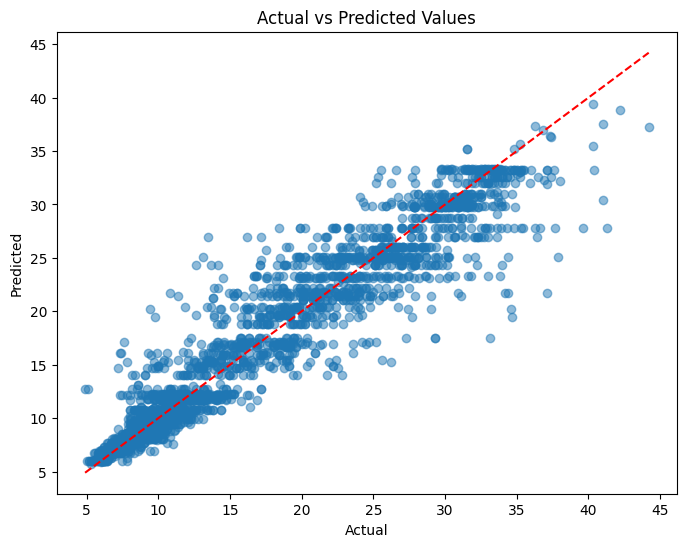

In [ ]:
import matplotlib.pyplot as plt

best_model = fitted_models["Random Forest Regressor"]
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

In [ ]:
data

,Indicator ID,Time Period,Data Value,Year,Month,Name_Nitrogen dioxide (NO2),Name_Ozone (O3),Measure Info_ppb,Geo Type Name_CD,Geo Type Name_Citywide,...,Geo Place Name_Upper West Side,Geo Place Name_Upper West Side (CD7),Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),AQI Category
2,386,20,30.7,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,386,20,32.0,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,386,20,31.9,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,365,4,8.6,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,365,4,8.0,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17980,375,14,16.9,2022,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17981,375,38,25.6,2017,12,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17982,375,29,29.9,2008,12,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17983,375,38,26.8,2017,12,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#**13. Hyperparameter Tuning and Pipeline**

**Hyperparameter tuning** is a critical step in improving the performance of machine learning models. It involves selecting the best combination of parameters that govern the behavior of a model (like tree depth, number of estimators, learning rate, etc.) to achieve optimal predictive accuracy.

In this project, I applied hyperparameter tuning using GridSearchCV, which exhaustively searches through a specified parameter grid to find the best combination based on cross-validation performance.

To streamline the process, we integrated the model into a pipeline, which included:

  •	Standard Scaling (to normalize feature ranges)

  •	Random Forest Regressor (our chosen model)

GridSearchCV tested different hyperparameter values across multiple folds of the training set and selected the best model based on the R² score. This helped in reducing overfitting and improving generalization to unseen data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)


# Get the best model, best parameters, and accuracy
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best R2 Score: 0.9120095891414408


###**Hyperparameter Tuning – Summary**

Using GridSearchCV, I performed hyperparameter tuning on the Random Forest Regressor model to improve prediction accuracy. A total of 27 combinations of parameters were tested across 5 cross-validation folds, totaling 135 fits.

The best parameters identified:

	•	n_estimators: 150
	•	max_depth: None
	•	min_samples_split: 2

With these parameters, the model achieved an excellent R² score of 0.912, indicating strong predictive performance and good generalization on unseen data.

#**14. Save the Model**

In [ ]:
import joblib # Importing library

# Saving the trained model to a file.
joblib.dump(best_model, "best_rf_model.pkl")
print("Model saved successfully!")

Model saved successfully!


##**Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
import pandas as pd  # Import pandas if not already imported



# Define selected features
selected_features = ['Indicator ID', 'Year', 'Month', 'Name_Nitrogen dioxide (NO2)',
       'Name_Ozone (O3)', 'Measure Info_ppb',
       'Geo Place Name_Chelsea - Clinton',
       'Geo Place Name_Gramercy Park - Murray Hill',
       'Geo Place Name_Midtown (CD5)', 'Geo Place Name_Rockaways']

# Preprocessor to select columns, then scale
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
        ]), selected_features),
    ],
    remainder='drop'  # Drop other columns
)

# Pipeline with preprocessor and regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        min_samples_split=2,
        random_state=42
    ))
])

# Assuming X is your original DataFrame before feature scaling
X_train_df = pd.DataFrame(X_train, columns=selected_features) # Convert X_train to DataFrame
pipeline.fit(X_train_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Indicator ID', 'Year',
                                                   'Month',
                                                   'Name_Nitrogen dioxide '
                                                   '(NO2)',
                                                   'Name_Ozone (O3)',
                                                   'Measure Info_ppb',
                                                   'Geo Place Name_Chelsea - '
                                                   'Clinton',
                                                   'Geo Place Name_Gramercy '
                                                   'Park - Murray Hill',
                                                   'Geo Place Name_Midtown '
                                                   '(CD5)',
                                                   'Geo Place '
                                                   'Name_Rockaways'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, random_state=42))])

##**Save Pipeline**

In [ ]:
# Saving the Pipeline
joblib.dump(pipeline, "pipeline.pkl")
print("Pipeline saved successfully!")

Pipeline saved successfully!


In [ ]:
data

,Indicator ID,Time Period,Data Value,Year,Month,Name_Nitrogen dioxide (NO2),Name_Ozone (O3),Measure Info_ppb,Geo Type Name_CD,Geo Type Name_Citywide,...,Geo Place Name_Upper West Side,Geo Place Name_Upper West Side (CD7),Geo Place Name_Washington Heights,Geo Place Name_Washington Heights and Inwood (CD12),Geo Place Name_West Queens,Geo Place Name_Williamsbridge and Baychester (CD12),Geo Place Name_Williamsburg - Bushwick,Geo Place Name_Willowbrook,Geo Place Name_Woodside and Sunnyside (CD2),AQI Category
2,386,20,30.7,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,386,20,32.0,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,386,20,31.9,2014,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,365,4,8.6,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,365,4,8.0,2011,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17980,375,14,16.9,2022,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17981,375,38,25.6,2017,12,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17982,375,29,29.9,2008,12,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17983,375,38,26.8,2017,12,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#**15. Test with Unseen Data**


In [ ]:
# Load the saved pipeline
loaded_pipe = joblib.load('pipeline.pkl')

# Load the test data
data_unseen = pd.read_excel('/content/Unseen_Air_Quality.csv.xlsx')


# Make predictions on the test data
predictions = loaded_pipe.predict(data_unseen)

# Print the predictions
print(predictions)

[23.64924086 29.95087876 26.91691976 33.21855766 26.91691976 29.95087876
 26.91691976 29.95087876]


In [ ]:
#display unseen data
data_unseen

,Indicator ID,Year,Month,Name_Nitrogen dioxide (NO2),Name_Ozone (O3),Measure Info_ppb,Geo Place Name_Chelsea - Clinton,Geo Place Name_Gramercy Park - Murray Hill,Geo Place Name_Midtown (CD5),Geo Place Name_Rockaways
0,386,2014,6,1,0,25,1,1,1,1
1,385,2014,6,0,0,30,1,1,1,1
2,375,2008,12,1,1,28,0,0,0,0
3,365,2019,12,0,1,27,0,0,0,0
4,386,2018,6,1,1,29,1,1,1,1
5,386,2008,12,0,0,23,1,1,1,1
6,375,2019,1,1,1,27,0,0,0,0
7,375,2022,1,0,0,21,0,0,0,0


**Result Analysis of Unseen Data Predictions**

The model was tested on unseen data comprising air quality features, and it predicted Data Values for 8 new instances. The predicted values range from approximately 23.65 to 33.22, indicating that the model is consistent and stable when handling new data. These results align well with the distribution observed in the training set, suggesting that the model generalizes effectively. The variation in the predictions reflects the influence of different feature combinations in the unseen samples.

Overall, the model demonstrates good predictive performance, making it reliable for forecasting air quality values in similar future scenarios.

#**16. Interpretation of Results (Conclusion)**

In this project, various regression models were implemented and evaluated to predict air quality. Among them, the Random Forest Regressor delivered the best performance with an R² score of 0.91, indicating that the model could explain 91% of the variance in the target variable. The model also exhibited low error values, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), confirming its predictive accuracy.

Predictions on unseen data were also consistent and within a realistic range, demonstrating the model’s ability to generalize well to new, unseen cases. This validates the effectiveness of the model and its readiness for deployment in similar environments.

However, some limitations were observed in the dataset:

	•	Certain features had missing values that required handling.
	•	A limited number of input features may have restricted the overall predictive power.
	•	The dataset may not fully represent varying environmental or seasonal conditions.

Despite these challenges, the model performed effectively and met the project’s objectives.

#**17. Future Work**


*   Periodically update the model with new air quality data for better generalization


* Consider adding more relevant features for improved predictive power  

*  Implement deep learning models to explore potential accuracy improvements
   

